In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl 

In [2]:
import tensorflow as tf 
from tensorflow import keras 

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


!pip install --upgrade tensorflow==2.0.0 

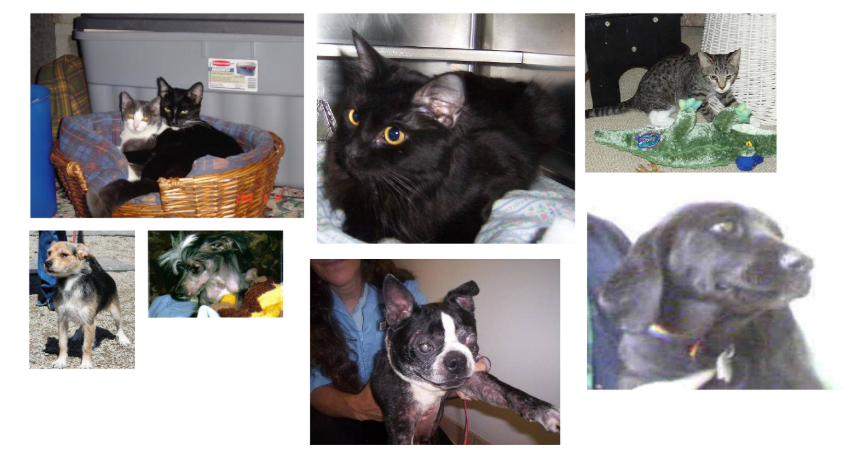

Dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). We will use 2000 pictures for training, 1000 for validation, and finally 1000 for testing

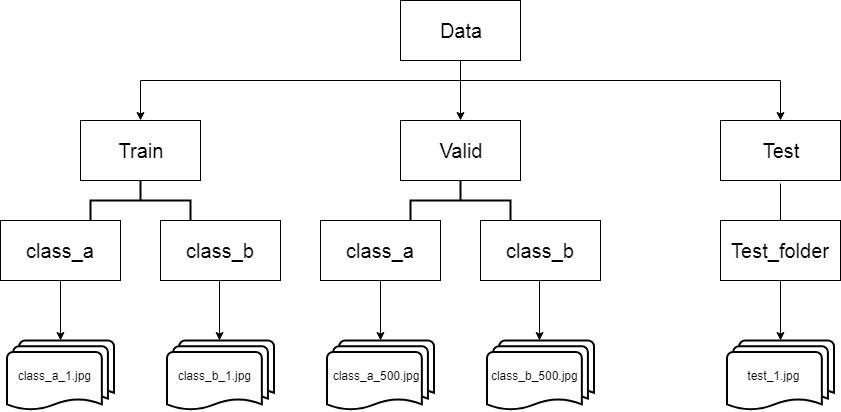

In [4]:
train_dir = ('/home/eeavlab/CNN-TF/dataset_cats_dogs/train/')
validation_dir = ('/home/eeavlab/CNN-TF/dataset_cats_dogs/validation/')
test_dir = ('/home/eeavlab/CNN-TF/dataset_cats_dogs/test/')

### Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size =(150,150),
                batch_size=20, 
                class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary'
                )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
with tf.device('/GPU:1'):
    model = models.Sequential()

    model.add(keras.layers.Conv2D(32, (3,3), input_shape = (150,150,3), activation= 'relu'))
    model.add(keras.layers.MaxPooling2D(2,2))

    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(2,2))

    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(2,2))

    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(2,2))

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(512, activation ='relu'))

    model.add(keras.layers.Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer =optimizers.RMSprop(lr= 1e-4),
             metrics =['acc'])

/home/eeavlab/.local/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs = 20,
        validation_data = validation_generator,
        validation_steps= 50 )

/home/eeavlab/.local/lib/python3.6/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 8s 57ms/step - loss: 0.6895 - acc: 0.5305 - val_loss: 0.6735 - val_acc: 0.5400
Epoch 2/20
100/100 [==============================] - 6s 56ms/step - loss: 0.6590 - acc: 0.6190 - val_loss: 0.6655 - val_acc: 0.5790
Epoch 3/20
100/100 [==============================] - 6s 57ms/step - loss: 0.6232 - acc: 0.6590 - val_loss: 0.6386 - val_acc: 0.6170
Epoch 4/20
100/100 [==============================] - 6s 57ms/step - loss: 0.5800 - acc: 0.6975 - val_loss: 0.6058 - val_acc: 0.6620
Epoch 5/20
100/100 [==============================] - 6s 57ms/step - loss: 0.5377 - acc: 0.7205 - val_loss: 0.5742 - val_acc: 0.6880
Epoch 6/20
100/100 [==============================] - 6s 57ms/step - loss: 0.5110 - acc: 0.7540 - val_loss: 0.5696 - val_acc: 0.7000
Epoch 7/20
100/100 [==============================] - 6s 56ms/step - loss: 0.4828 - acc: 0.7575 - val_loss: 0.5954 - val_acc: 0.6920
Epoch 8/20
100/100 [==============================] - 6s 56ms/step - 

In [13]:
model_save = model.save('cnn_scratch1.h5')

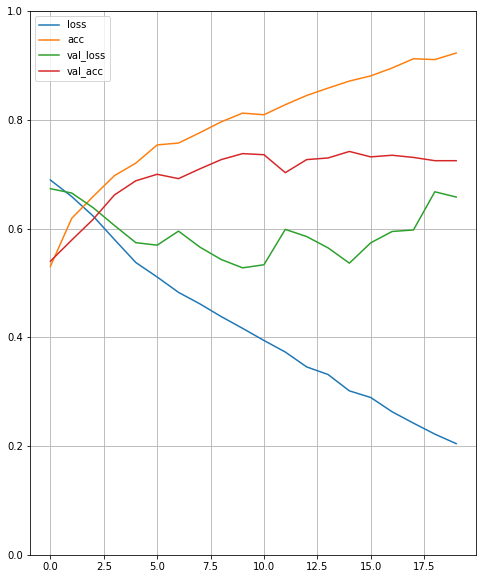

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
from tensorflow.keras import backend as K
K.clear_session()
del model

In [33]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40, 
                width_shift_range=0.2,
                shear_range =0.2, 
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
model = models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), input_shape = (150,150,3), activation= 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation ='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

/home/eeavlab/.local/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [43]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=50, 
        epochs=100, 
        validation_data=validation_generator,
        validation_steps=50)

/home/eeavlab/.local/lib/python3.6/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 [==============================] - 10s 189ms/step - loss: 0.3763 - acc: 0.8327 - val_loss: 0.4592 - val_acc: 0.7950
Epoch 2/100
50/50 [==============================] - 7s 147ms/step - loss: 0.3757 - acc: 0.8415
Epoch 3/100
50/50 [==============================] - 7s 147ms/step - loss: 0.3658 - acc: 0.8378
Epoch 4/100
50/50 [==============================] - 7s 148ms/step - loss: 0.3654 - acc: 0.8289
Epoch 5/100
50/50 [==============================] - 7s 147ms/step - loss: 0.3821 - acc: 0.8157
Epoch 6/100
50/50 [==============================] - 7s 147ms/step - loss: 0.3619 - acc: 0.8378
Epoch 7/100
50/50 [==============================] - 7s 148ms/step - loss: 0.3588 - acc: 0.8327
Epoch 8/100
50/50 [==============================] - 7s 149ms/step - loss: 0.3433 - acc: 0.8438
Epoch 9/100
50/50 [==============================] - 8s 150ms/step - loss: 0.3713 - acc: 0.8344
Epoch 10/100
50/50 [==============================] - 7s 148ms/step - loss: 0.3547 - acc: 0.8434
E

In [44]:
model.save("cnn_scratch.h5")

# VGG16

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40, 
                width_shift_range=0.2,
                shear_range =0.2, 
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size= 20,
                                                       class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


In [22]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers 

In [24]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


If you want to save time and not use final weights from the vgg16 layer, you can freeze that layer 

In [26]:
# conv_base.trainable = False 

In [28]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc'])

In [29]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Porject_Model_VGG16-{epoch:02d}.h5")

In [30]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50,
            callbacks =[checkpoint_cb])

/home/eeavlab/.local/lib/python3.6/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 16s 127ms/step - loss: 0.4583 - acc: 0.7765 - val_loss: 0.2311 - val_acc: 0.9220
Epoch 2/30
100/100 [==============================] - 12s 124ms/step - loss: 0.2548 - acc: 0.8970 - val_loss: 0.1662 - val_acc: 0.9320
Epoch 3/30
100/100 [==============================] - 12s 118ms/step - loss: 0.1987 - acc: 0.9215 - val_loss: 0.1570 - val_acc: 0.9390
Epoch 4/30
100/100 [==============================] - 12s 118ms/step - loss: 0.1640 - acc: 0.9275 - val_loss: 0.1103 - val_acc: 0.9540
Epoch 5/30
100/100 [==============================] - 12s 122ms/step - loss: 0.1338 - acc: 0.9495 - val_loss: 0.1036 - val_acc: 0.9590
Epoch 6/30
100/100 [==============================] - 12s 118ms/step - loss: 0.1044 - acc: 0.9590 - val_loss: 0.0996 - val_acc: 0.9640
Epoch 7/30
100/100 [==============================] - 12s 118ms/step - loss: 0.1069 - acc: 0.9580 - val_loss: 0.1109 - val_acc: 0.9680
Epoch 8/30
100/100 [==============================] - 1

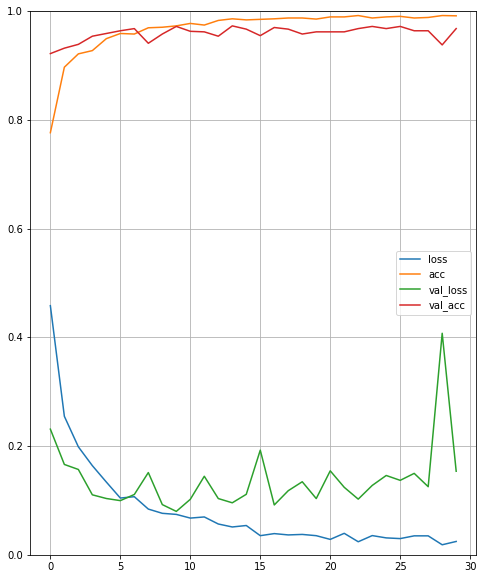

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode= 'binary')

Found 1000 images belonging to 2 classes.


In [33]:
model.evaluate_generator(test_generator, steps=50)

/home/eeavlab/.local/lib/python3.6/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2432250678539276, 0.9679999947547913]